# Data Mining Project- Part I: Exploratory Data Analysis #

In this notebook, we will start the analysis of the dataset "DM2425_ABCDEats_DATASET.csv". As such, we will go through a few stages such as data processing and cleaning, data analysis and visualization.

## Table of Contents:
1. **Importing the necessary packages and the main dataframe:**
    - Importing the necessary packages such as pandas, numpy, matplotlib, and seaborn.
    - Loading the dataset.
2. **Exploring the Dataset:**
    - Summarizing essential statistics to understand the dataset's structure and the significance of each feature.
    - Identifying missing values and treating them.
    - Checking for duplicates.
    - Exploring categorical variables and numerical variables.
    - Identifying and treating anomalous values.
3. **Identifying Patterns:**
    - Detecting trends, relationships, and anomalies that may impact further analysis or decision-making.
    - Identifying correlations between features.
4. **Feature Creation:**
    - Creating new features that could enrich the dataset and potentially reveal deeper insights.
5. **Visualization:**
    - Creating visualizations to explore the data and identify potencial patterns and relationships between the features.

**Work developed by:**  
Maria Pereira 20240314  
Miguel Mangerona 20240595  
Rita Morgadito 20240611 

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Initial analysis of the data set ### 

In [2]:
df=pd.read_csv("DM2425_ABCDEats_DATASET.csv")

In [3]:
df.tail()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,...,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
31887,fd40d3b0e0,4660,30.0,1,1,0,NaN,0,-,CASH,...,0,0,1,0,0,0,0,0,0,0


In [4]:
print('The dataset has', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset has 31888 rows and 56 columns.


In [5]:
#Substitute the Nan values with the median of the respective column
df['customer_age'].fillna(df['customer_age'].median(), inplace=True)

/var/folders/8v/1qhsx6xs4ts98l6wng3p3dy00000gn/T/ipykernel_2849/338681763.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_age'].fillna(df['customer_age'].median(), inplace=True)


In [6]:
#Switching the customer_id and customer_region columns to integer type for numerical operations
df['customer_age'] = df['customer_age'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31888 non-null  int64  
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

The `.describe()` is a method that provides summaru statistics of the dataframe.
 - `df.describe()`: this method only includes numeric columns
 - `df.describe(include='object')`: this method focud on object-type cokumns which usually include categorical values 
- `df.describe(include='all')`: this method show as statistics from both numerical and object columns 

In [8]:
#Checking statistics of the columns with numerical type
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31888.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.472153,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.082367,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [9]:
#Checking statistics of the columns with object type
df.describe(include="object").T

,count,unique,top,freq
customer_id,31888,31875,742ca068fc,2
customer_region,31888,9,8670,9761
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


In [10]:
df.describe(include = "all")

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31888,31888,31888.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888,31888,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
unique,31875,9,NaN,NaN,NaN,NaN,NaN,NaN,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,742ca068fc,8670,NaN,NaN,NaN,NaN,NaN,NaN,-,CARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,9761,NaN,NaN,NaN,NaN,NaN,NaN,16748,20161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,27.472153,3.102609,5.668245,2.818866,28.478604,63.675521,NaN,NaN,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,NaN,NaN,7.082367,2.771587,6.957287,3.977529,24.109086,23.226123,NaN,NaN,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,NaN,NaN,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Search for trends, patterns, or anomalies within the dataset ###


In [11]:
#Checking for missing values
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                   0
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

The `.isna()` gives as *False* if the value exist and *True* if the value in the cell is missing 

In [12]:
df.isna()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31884,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31885,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31886,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#Visualizing which regions exist
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

In [14]:
df['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

In [15]:
#Replacing empty customer regions with Nan
df["customer_region"]=df["customer_region"].replace("-",np.nan)

In [16]:
#Checking if there are any duplicated values in the column customer id
print(df['customer_id'].duplicated().sum())

13


In [17]:
#Concatenate those columns
pd.concat(identifier for _, identifier in df.groupby('customer_id') if len(identifier) > 1)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
28706,06018a56be,8550,27,2,2,0,67.0,89,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
28713,06018a56be,8550,27,2,2,0,67.0,89,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
27653,201a13a34d,8550,28,2,2,1,62.0,62,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,1
27739,201a13a34d,8550,28,2,2,1,62.0,62,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,1
7867,24251eb7da,8550,28,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
7887,24251eb7da,8550,28,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
16227,671bf0c738,8550,25,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
16230,671bf0c738,8550,25,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
24822,6bbf5f74cd,8550,22,10,20,9,48.0,88,-,CARD,...,0,0,0,0,0,0,0,0,0,0
24827,6bbf5f74cd,8550,22,10,20,9,48.0,88,-,CARD,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Showing which are the not numerical columns, and their corresponding values (unique values only)
non_numerical_columns = df.select_dtypes(exclude=['number']).columns

for column in non_numerical_columns:
    unique_values = df[column].unique()
    print(f"Column name: {column}")
    print(f"Corresponding values: {unique_values}\n")


Column name: customer_id
Corresponding values: ['1b8f824d5e' '5d272b9dcb' 'f6d1b2ba63' ... 'f74ad8ce3f' 'f7b19c0241'
 'fd40d3b0e0']

Column name: customer_region
Corresponding values: ['2360' '8670' '4660' '2440' nan '4140' '2490' '8370' '8550']

Column name: last_promo
Corresponding values: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']

Column name: payment_method
Corresponding values: ['DIGI' 'CASH' 'CARD']



In [19]:
#Showing the duplicated rows
df[df.duplicated()==True]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
3379,b55012ee1c,8550,23,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
7887,24251eb7da,8550,28,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
16230,671bf0c738,8550,25,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
20907,742ca068fc,8550,20,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
24329,df91183978,8550,23,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0
24827,6bbf5f74cd,8550,22,10,20,9,48.0,88,-,CARD,...,0,0,0,0,0,0,0,0,0,0
25793,8aa9bbc147,8550,24,2,4,2,53.0,59,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,0
27515,cf563a0a98,8550,27,2,2,0,61.0,62,FREEBIE,CASH,...,0,0,0,0,0,0,0,0,0,0
27739,201a13a34d,8550,28,2,2,1,62.0,62,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,1
28713,06018a56be,8550,27,2,2,0,67.0,89,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.duplicated().sum()

13

In [21]:
df['customer_id'].duplicated().sum()

13

In [22]:
df[df['customer_id'].duplicated()].head(13)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
3379,b55012ee1c,8550,23,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
7887,24251eb7da,8550,28,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
16230,671bf0c738,8550,25,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
20907,742ca068fc,8550,20,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
24329,df91183978,8550,23,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0
24827,6bbf5f74cd,8550,22,10,20,9,48.0,88,-,CARD,...,0,0,0,0,0,0,0,0,0,0
25793,8aa9bbc147,8550,24,2,4,2,53.0,59,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,0
27515,cf563a0a98,8550,27,2,2,0,61.0,62,FREEBIE,CASH,...,0,0,0,0,0,0,0,0,0,0
27739,201a13a34d,8550,28,2,2,1,62.0,62,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,1
28713,06018a56be,8550,27,2,2,0,67.0,89,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df[df['customer_id'].duplicated(keep='last')].head(13)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
3355,b55012ee1c,8550,23,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
7867,24251eb7da,8550,28,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
16227,671bf0c738,8550,25,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
20855,742ca068fc,8550,20,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
24328,df91183978,8550,23,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0
24822,6bbf5f74cd,8550,22,10,20,9,48.0,88,-,CARD,...,0,0,0,0,0,0,0,0,0,0
25792,8aa9bbc147,8550,24,2,4,2,53.0,59,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,0
27514,cf563a0a98,8550,27,2,2,0,61.0,62,FREEBIE,CASH,...,0,0,0,0,0,0,0,0,0,0
27653,201a13a34d,8550,28,2,2,1,62.0,62,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,1
28706,06018a56be,8550,27,2,2,0,67.0,89,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df.shape

(31888, 56)

In [25]:
df.drop_duplicates(subset = ['customer_id','customer_region']).shape

(31875, 56)

In [26]:
df.drop_duplicates(subset = ['customer_id']).shape

(31875, 56)

In [27]:
#Setting the customer id as the index of the df
df.set_index('customer_id', inplace=True)

### **2.** New Features ###

#### 2.1 Creating New Features ####

##### We decided to create this 6 new features to help us enhance our analysis #####

In [28]:
#Creating a new features list
new_features = []

#### 2.1.1 Money Spent by Costumer ####

In [29]:
cui_columns = [col for col in df.columns if col.startswith('CUI')]
df['tot_value_cui'] = df[cui_columns].sum(axis=1)
new_features.append('tot_value_cui')

#### 2.1.2 Order Duration ####

In [30]:
#Creating a column that stores the calculation of days since the first order
df['order_duration'] = df['last_order'] - df['first_order']
new_features.append('order_duration')

#### 2.1.3 Order Frequency ####

In [31]:
#Creating a column that stores the frequency of how often a customer places orders (based on their first_order and last_order values)
df['order_frequency'] = df['product_count'] / (df['last_order'] - df['first_order'] + 1) 
new_features.append('order_frequency')

#### 2.1.4 Prefered Time of the Day ####

In [32]:
df['preferred_order_hour'] = df[[f'HR_{i}' for i in range(24)]].idxmax(axis=1).str.replace('HR_', '').astype(int)
new_features.append('preferred_order_hour')

#### 2.1.5 Prefered Day of the Week ####

In [33]:
df['preferred_order_day'] = df[[f'DOW_{i}' for i in range(7)]].idxmax(axis=1).str.replace('DOW_', '').astype(int)
new_features.append('preferred_order_day')

#### 2.1.6 Age Group ####

In [34]:
#Creating a column that stores the age group to which the consumer belongs
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create the age_category column
df['age_category'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False)
new_features.append('age_category')

### 2.2 New Features Statistics ###

In [35]:
df[new_features].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tot_value_cui,31888.0,NaN,NaN,NaN,38.303043,46.412121,0.0,12.8875,24.14,44.99,1418.33
order_duration,31782.0,NaN,NaN,NaN,35.409288,29.417128,0.0,3.0,34.0,62.0,90.0
order_frequency,31782.0,NaN,NaN,NaN,0.471221,0.649079,0.0,0.093333,0.171053,0.666667,14.0
preferred_order_hour,31888.0,NaN,NaN,NaN,11.635913,5.256446,0.0,9.0,12.0,16.0,23.0
preferred_order_day,31888.0,NaN,NaN,NaN,2.672918,2.032697,0.0,1.0,3.0,4.0,6.0
age_category,31888,7,25-34,15060,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Visualisations ###

##### Visualizations helps us transforming complex data into clear insights, enabling us to uncover patterns and communicate findings effectively."  #####

In [73]:
import seaborn as sb
import matplotlib.pyplot as plt

#### 3.1 Money spent by customer ####

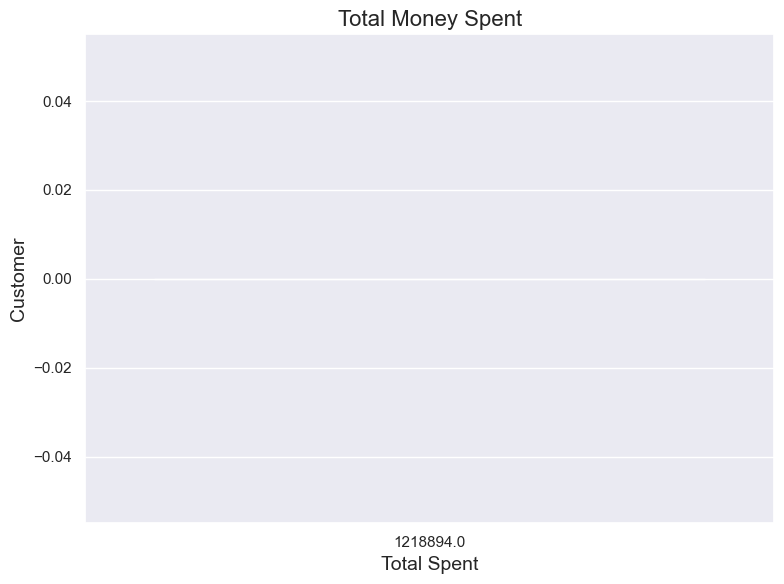

In [163]:
# Confirmar que a nova coluna 'tot_value_cui' foi criada corretamente
if 'tot_value_cui' not in df.columns:
    # Se a coluna não existe, recriar a coluna
    cui_columns = [col for col in df.columns if col.startswith('CUI')]
    df['tot_value_cui'] = df[cui_columns].sum(axis=1)

# Verificar se a coluna 'tot_value_cui' possui dados
if df['tot_value_cui'].isnull().all():
    print("A coluna 'tot_value_cui' está vazia ou contém apenas valores nulos.")
else:
    # Calcular o total de dinheiro gasto
    total_spent = df['tot_value_cui'].sum()

    # Criar um DataFrame para o gráfico
    total_spent_df = pd.DataFrame({'Total Spent': [total_spent]})

    plt.figure(figsize=(8, 6))
    sns.barplot(data=total_spent_df, x='Total Spent', y=total_spent_df.index, color='salmon')

    # Melhorar o título e os rótulos
    plt.title('Total Money Spent', fontsize=16)
    plt.xlabel('Total Spent', fontsize=14)
    plt.ylabel('Customer', fontsize=14)

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()




#### 3.2 Orders by payament type ####

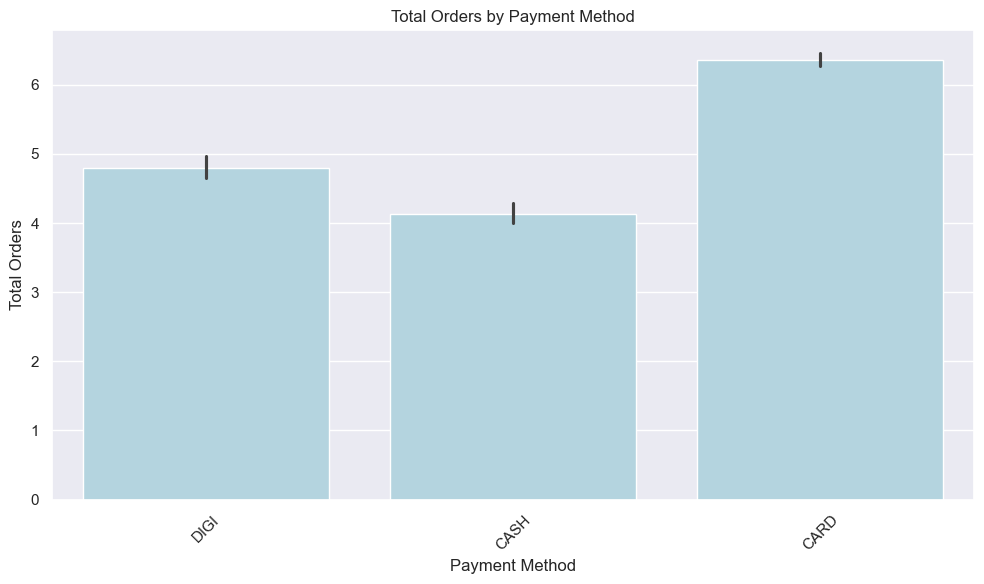

In [130]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='payment_method', y='product_count', color='lightblue')
plt.title('Total Orders by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 3.3 Orders by region  ####

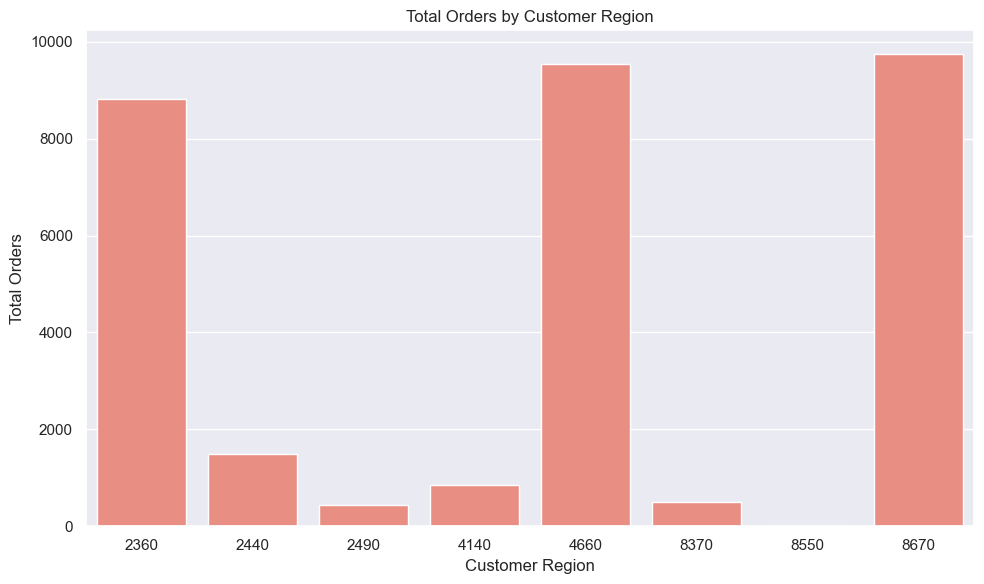

In [117]:
total_orders = df.groupby('customer_region').size().reset_index(name='total_orders')

plt.figure(figsize=(10, 6))
sns.barplot(data=total_orders, x='customer_region', y='total_orders', color='salmon')
plt.title('Total Orders by Customer Region')
plt.xlabel('Customer Region')
plt.ylabel('Total Orders')
plt.tight_layout()
plt.show()



#### 3.4 Prefered Cuisine Types ####

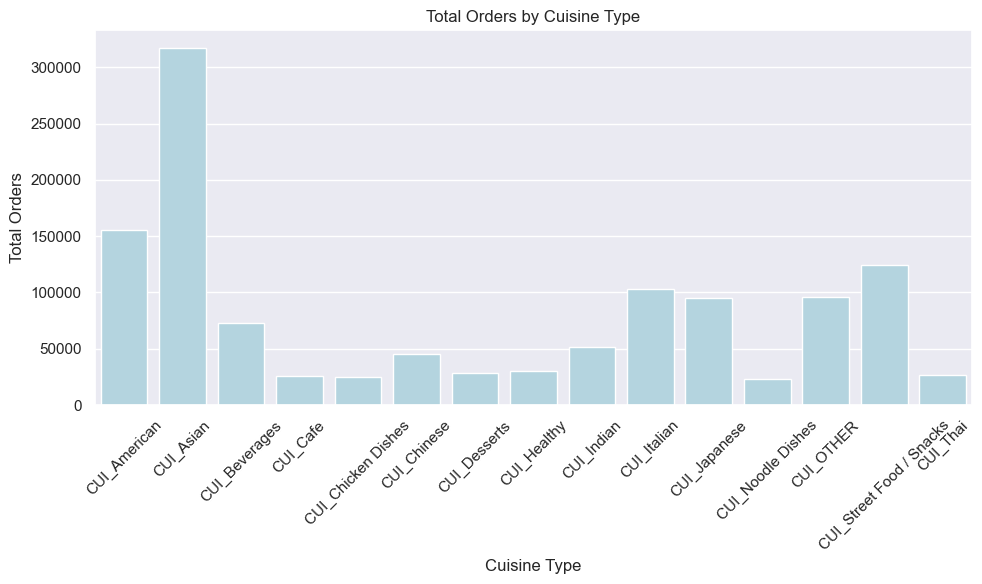

In [129]:
# Supondo que df já exista e contém as colunas de culinária
cuisine_columns = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 
                   'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                   'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 
                   'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 
                   'CUI_Street Food / Snacks', 'CUI_Thai']

# Criar um DataFrame que contém os totais para cada tipo de culinária
total_cuisines = df[cuisine_columns].sum().reset_index()
total_cuisines.columns = ['Cuisine Type', 'Total Orders']
plt.figure(figsize=(10, 6))
sns.barplot(data=total_cuisines, x='Cuisine Type', y='Total Orders', color='lightblue')
plt.title('Total Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()


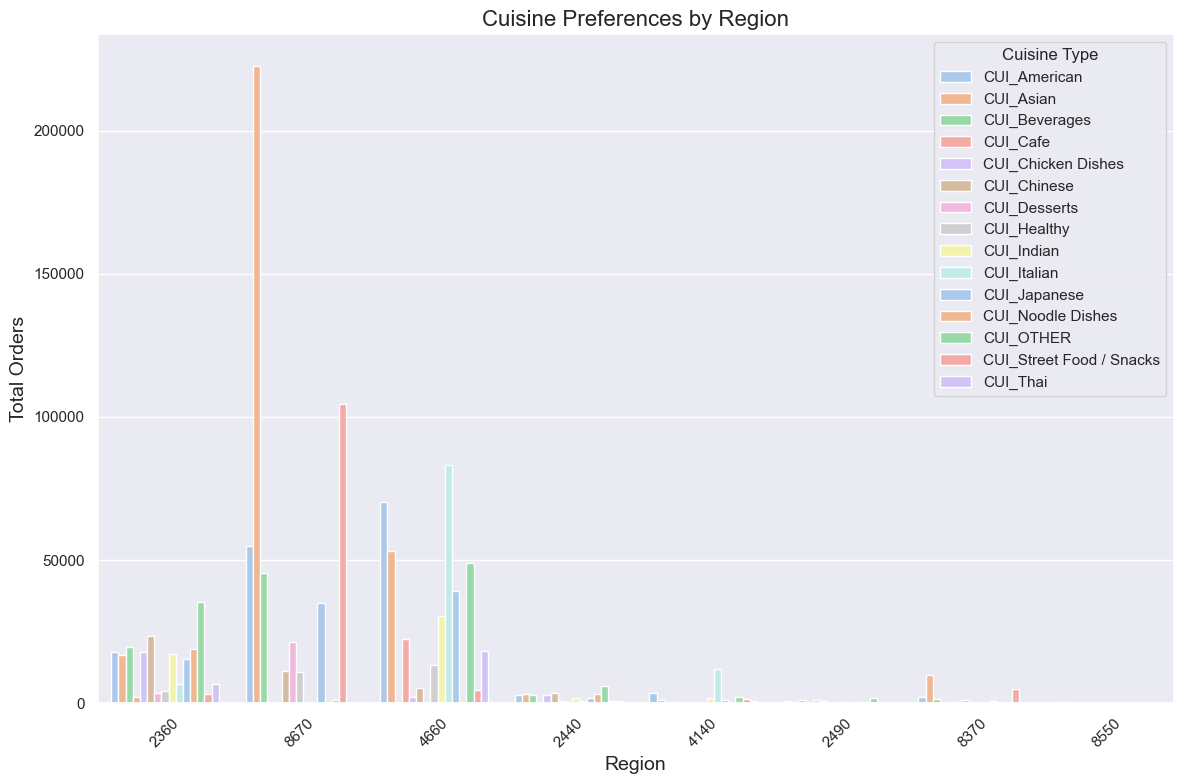

In [164]:
# Primeiro, vamos calcular a soma de pedidos por região e tipo de culinária
cui_columns = [col for col in df.columns if col.startswith('CUI')]
cuisine_counts = df[cui_columns].sum().reset_index()
cuisine_counts.columns = ['Cuisine Type', 'Count']

# Adicionar a coluna de região ao DataFrame
region_cuisine = pd.DataFrame()

for region in df['customer_region'].unique():
    region_data = df[df['customer_region'] == region][cui_columns].sum().reset_index()
    region_data.columns = ['Cuisine Type', 'Count']
    region_data['Region'] = region
    region_cuisine = pd.concat([region_cuisine, region_data], ignore_index=True)

# Criar um gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(data=region_cuisine, x='Region', y='Count', hue='Cuisine Type', palette='pastel')

# Melhorar o título e os rótulos
plt.title('Cuisine Preferences by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)
plt.xticks(rotation=45)

# Exibir o gráfico
plt.legend(title='Cuisine Type')
plt.tight_layout()
plt.show()

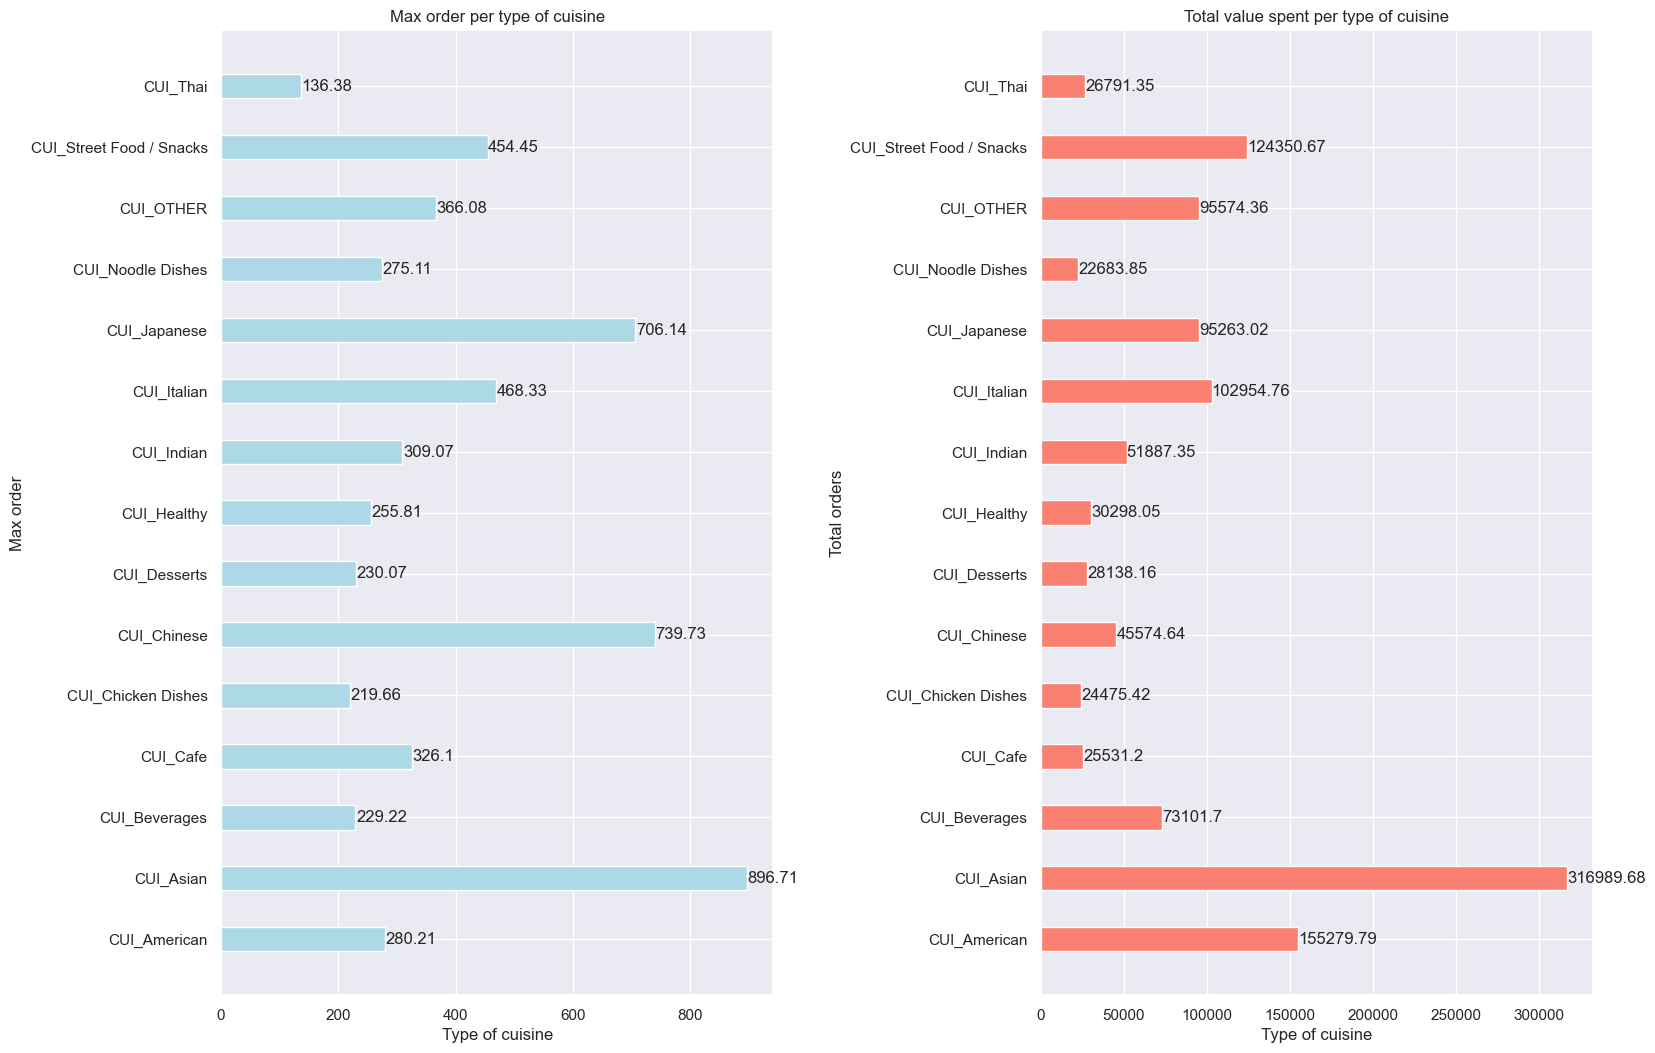

In [131]:
max_values = df[cui_columns].max()
sum_values = df[cui_columns].sum().round(2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 11))

axes[0].barh(max_values.index, max_values.values, color='lightblue', height=0.4)
axes[0].set_title('Max order per type of cuisine')
axes[0].set_xlabel('Type of cuisine')
axes[0].set_ylabel('Max order')
for i in range(len(max_values)):
    axes[0].text(max_values.values[i] + 1, i, str(max_values.values[i]), va='center', fontsize=12)

axes[1].barh(sum_values.index, sum_values.values, color='salmon', height=0.4)
axes[1].set_title('Total value spent per type of cuisine')
axes[1].set_xlabel('Type of cuisine')
axes[1].set_ylabel('Total orders')
for i in range(len(sum_values)):
    axes[1].text(sum_values.values[i] + 1, i, str(sum_values.values[i]),va='center', fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

#### 3.5 Prefered Days and Hours ####


   Category  Total Orders  Mean Orders
0  Weekdays         98946      19789.2
1  Weekends         40108      20054.0


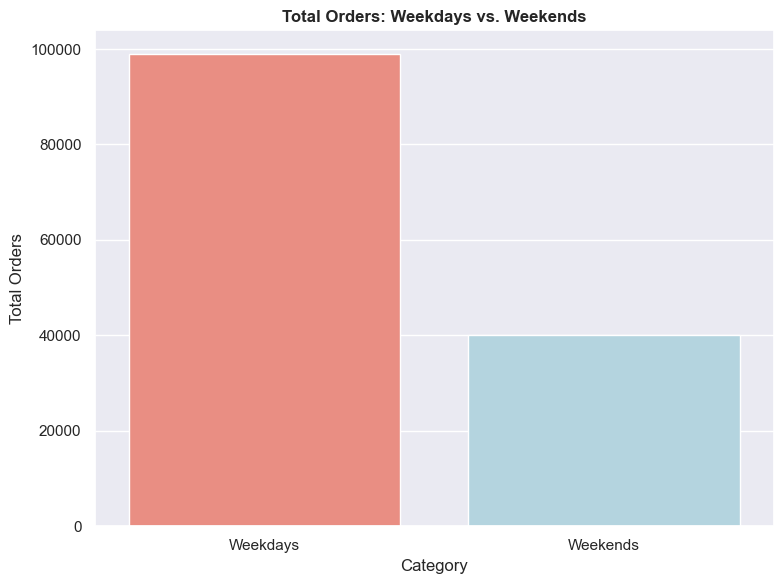

In [115]:

# Definir as colunas de dias úteis e fins de semana
weekday_columns = ['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5']
weekend_columns = ['DOW_0', 'DOW_6']

# Calcular o total de pedidos para dias úteis e fins de semana
weekday_orders = df[weekday_columns].sum().sum() 
weekend_orders = df[weekend_columns].sum().sum() 

# Dados para o gráfico de barras
labels = ['Weekdays', 'Weekends']
sizes = [weekday_orders, weekend_orders]
colors = ['seagreen', 'peru']

# Criar um DataFrame para armazenar os pedidos e suas médias
orders_data = {
    'Category': labels,
    'Total Orders': sizes,
    'Mean Orders': [weekday_orders_mean, weekend_orders_mean]}
DOW_orders_df = pd.DataFrame(orders_data)
print(DOW_orders_df)

# Plotar o gráfico de barras com 'hue' e 'legend=False' para evitar o aviso
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Total Orders', data=DOW_orders_df, hue='Category', palette=['salmon', 'lightblue'], legend=False)
plt.title('Total Orders: Weekdays vs. Weekends', fontweight='bold')
plt.ylabel('Total Orders')
plt.xlabel('Category')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


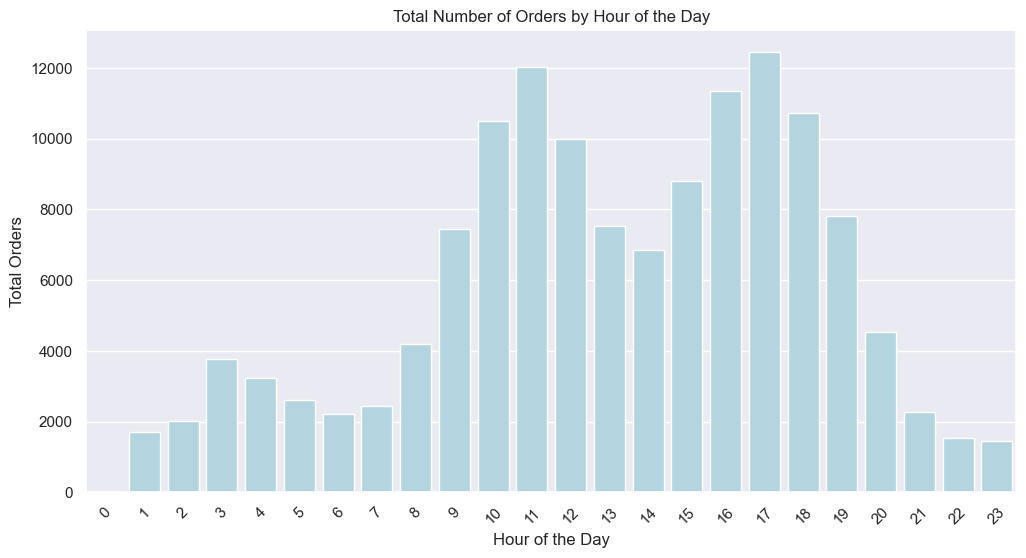

In [132]:

hourly_columns = [f'HR_{i}' for i in range(24)]

hourly_totals = df[hourly_columns].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_totals.index.str.replace("HR_", ""), y=hourly_totals.values, color="lightblue")

plt.title('Total Number of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()


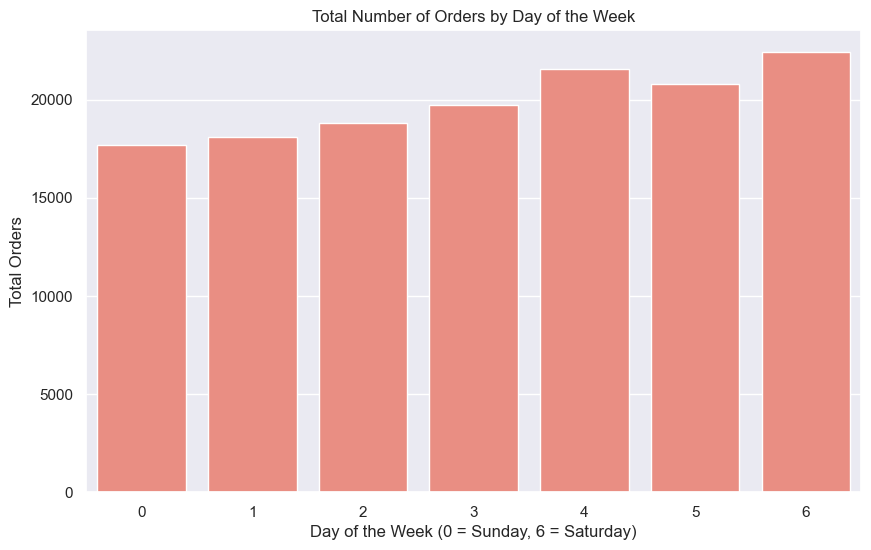

In [133]:
weekly_columns = [f'DOW_{i}' for i in range(7)]

weekly_totals = df[weekly_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_totals.index.str.replace("DOW_", ""), y=weekly_totals.values, color="salmon")

plt.title('Total Number of Orders by Day of the Week')
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)')
plt.ylabel('Total Orders')
plt.show()


/var/folders/8v/1qhsx6xs4ts98l6wng3p3dy00000gn/T/ipykernel_8335/566862304.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticks(), rotation=45)


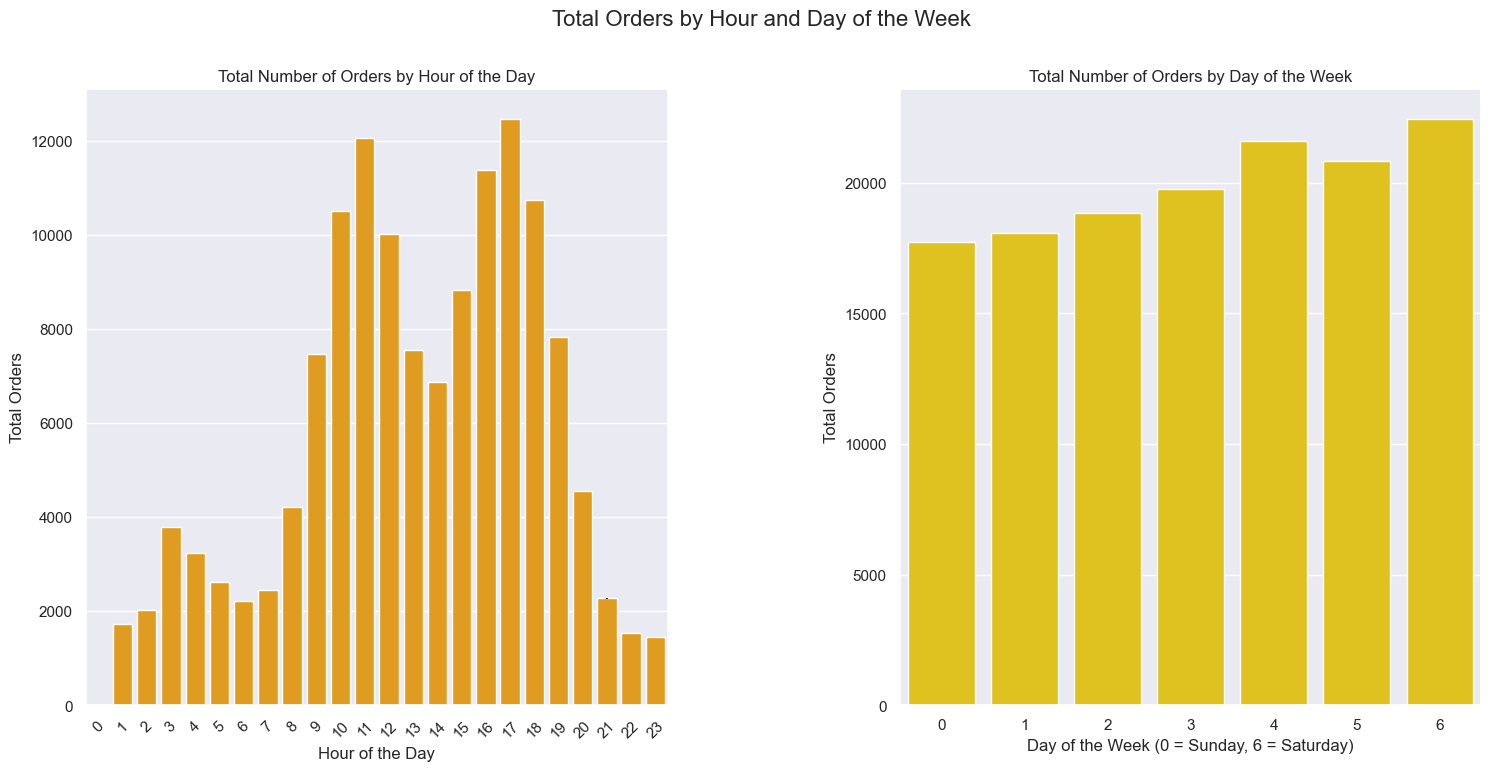

In [ ]:
# Colunas e totais por hora
hourly_columns = [f'HR_{i}' for i in range(24)]
hourly_totals = df[hourly_columns].sum()
hourly_error = df[hourly_columns].std()  # Exemplo de erro com desvio padrão

# Colunas e totais por dia da semana
weekly_columns = [f'DOW_{i}' for i in range(7)]
weekly_totals = df[weekly_columns].sum()
weekly_error = df[weekly_columns].std()  # Exemplo de erro com desvio padrão

# Configurando a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'wspace': 0.4})

# Gráfico de totais por hora do dia
sns.barplot(
    x=hourly_totals.index.str.replace("HR_", ""), y=hourly_totals.values,
    yerr=hourly_error.values, color="orange", ax=axes[0], capsize=0.2
)
axes[0].set_title('Total Number of Orders by Hour of the Day')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Total Orders')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation=45)

# Gráfico de totais por dia da semana
sns.barplot(
    x=weekly_totals.index.str.replace("DOW_", ""), y=weekly_totals.values,
    yerr=weekly_error.values, color="gold", ax=axes[1], capsize=0.2
)
axes[1].set_title('Total Number of Orders by Day of the Week')
axes[1].set_xlabel('Day of the Week (0 = Sunday, 6 = Saturday)')
axes[1].set_ylabel('Total Orders')

plt.suptitle('Total Orders by Hour and Day of the Week', fontsize=16)
plt.show()


#### 3.6 Age ####

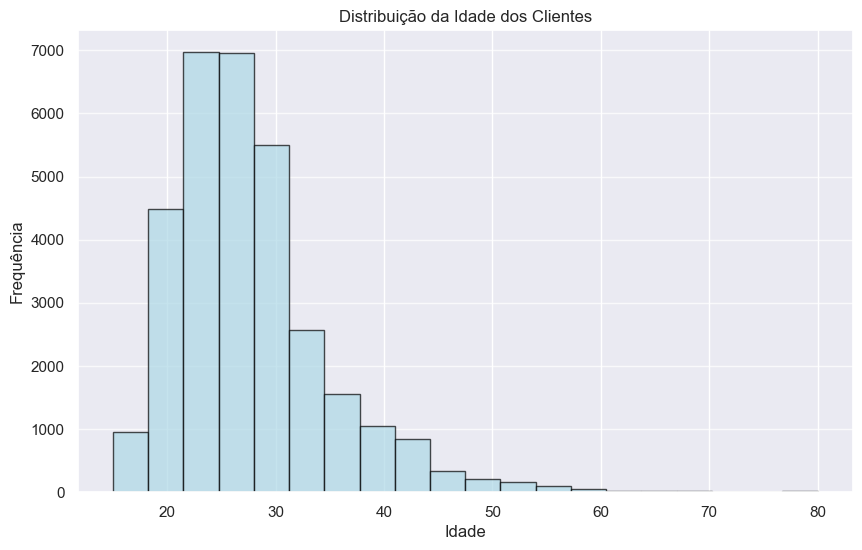

In [134]:
plt.figure(figsize=(10, 6))
plt.hist(df['customer_age'], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()


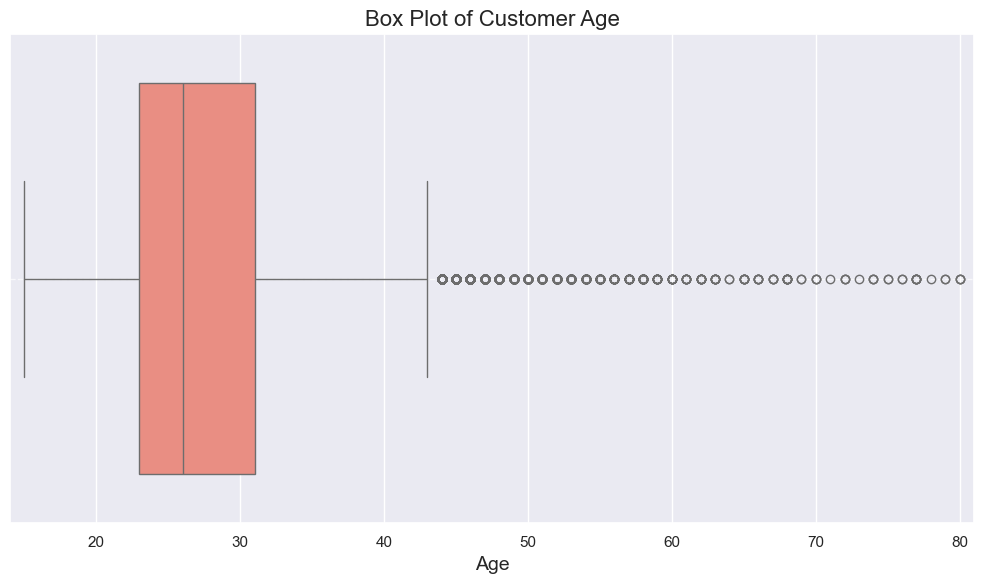

In [155]:
if df.index.has_duplicates:
    df = df.reset_index(drop=True)

plt.figure(figsize=(10, 6))  # Aumentar o tamanho da figura
sns.boxplot(x=df['customer_age'], color='salmon')

# Melhorar o título e os rótulos
plt.title('Box Plot of Customer Age', fontsize=16)
plt.xlabel('Age', fontsize=14)

# Adicionar linhas de grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar os limites do eixo x, se necessário
plt.xlim(df['customer_age'].min() - 1, df['customer_age'].max() + 1)  # Adiciona um pequeno espaço nas extremidades

# Exibir o gráfico
plt.tight_layout()
plt.show()

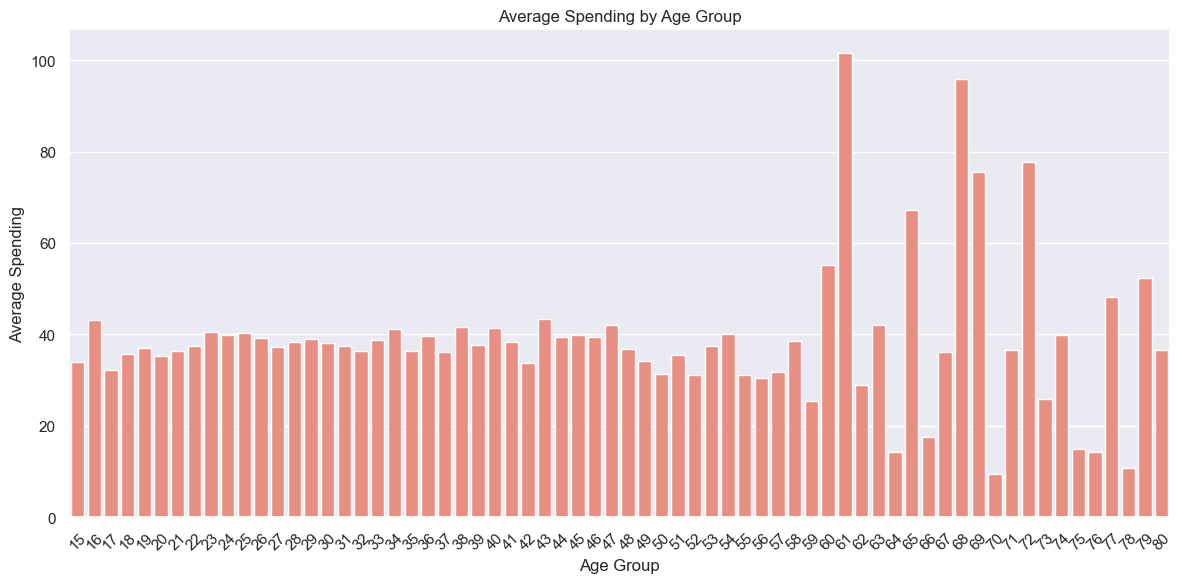

In [146]:
# Calcular a média de gastos por faixa etária
mean_spending = df.groupby('customer_age')['tot_value_cui'].mean().reset_index()

plt.figure(figsize=(12, 6))  # Aumentar o tamanho da figura
sns.barplot(data=mean_spending, x='customer_age', y='tot_value_cui', color='salmon')
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x
plt.tight_layout()
plt.show()


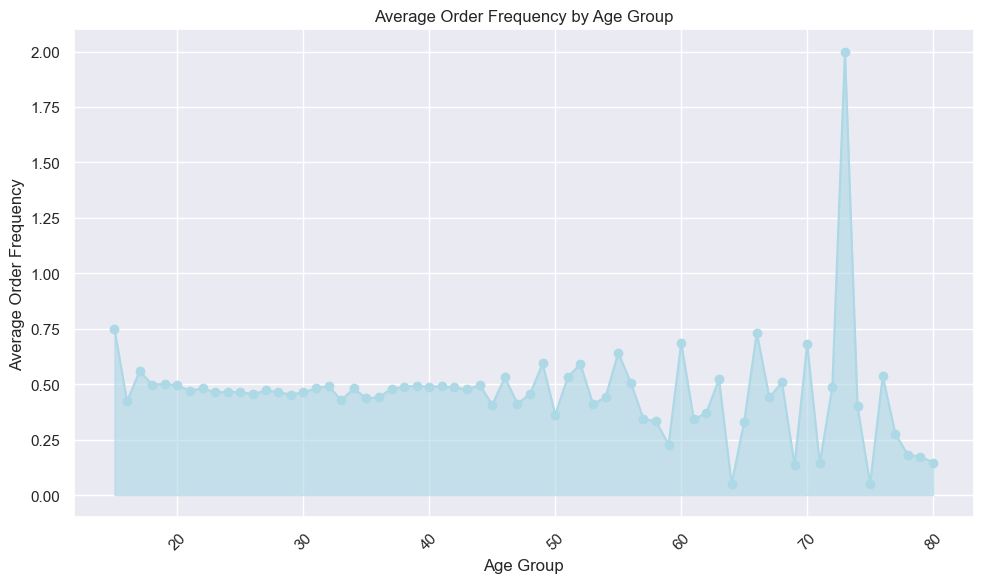

In [154]:
plt.figure(figsize=(10, 6)) 
plt.fill_between(mean_frequency['customer_age'], mean_frequency['order_frequency'], color='lightblue', alpha=0.6)
plt.plot(mean_frequency['customer_age'], mean_frequency['order_frequency'], marker='o', color='lightblue')
plt.title('Average Order Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Order Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Relations between important features ###

#### Age and Money spent ####

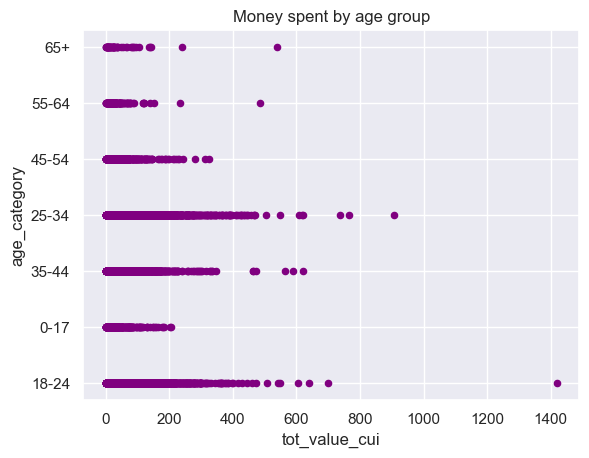

In [ ]:
df.plot(kind="scatter", x="tot_value_cui", y="age_category", color="purple", title="Money spent by age group")
plt.show()

In [ ]:
#sns.pairplot Para fazermos com muitas features

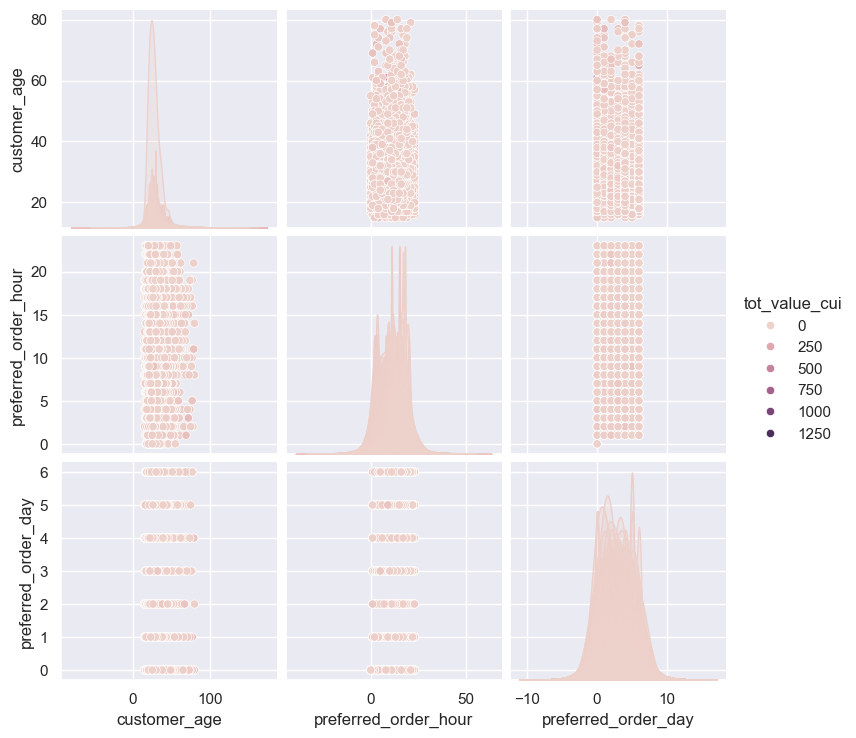

In [ ]:
#Isto faz me sentido mas está muito confuso se interpretar
sns.pairplot(df, vars=["customer_age","preferred_order_hour","preferred_order_day"],hue="tot_value_cui")
plt.show()

In [ ]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'tot_value_cui',
       'order_duration', 'order_frequency', 'preferred_order_hour',
       'preferred_order_day', 'age_category'],
      dtype='object')

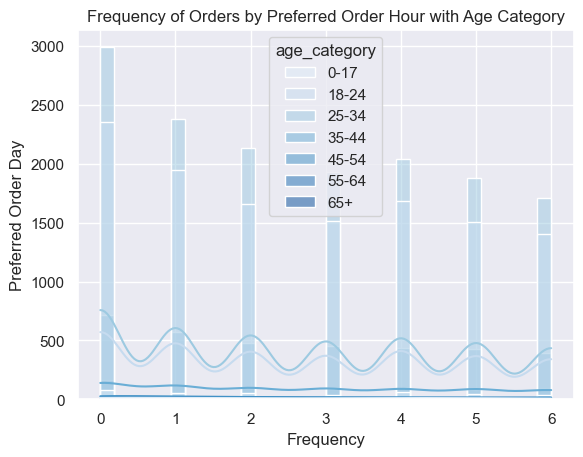

In [39]:
sns.histplot(data=df, x='preferred_order_day', hue='age_category', kde=True, palette="Blues")
plt.title("Frequency of Orders by Preferred Order Hour with Age Category")
plt.xlabel("Frequency")
plt.ylabel("Preferred Order Day")
plt.show()

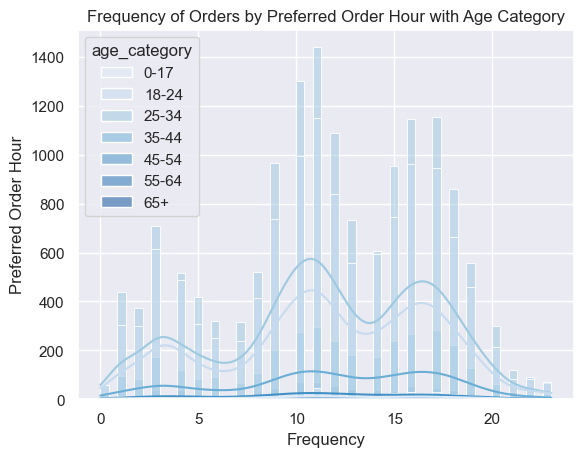

In [47]:
sns.histplot(data=df, x='preferred_order_hour', hue='age_category', kde=True, palette="Blues")
plt.title("Frequency of Orders by Preferred Order Hour with Age Category")
plt.xlabel("Frequency")
plt.ylabel("Preferred Order Hour")
plt.show()

<Axes: xlabel='age_category', ylabel='Count'>

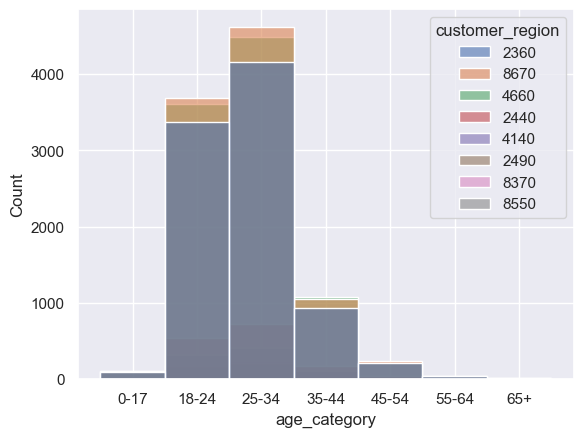

In [48]:
#Customer per age category
sns.histplot(data=df, x='age_category', hue='customer_region', kde=False, alpha=0.6)


Correlação 

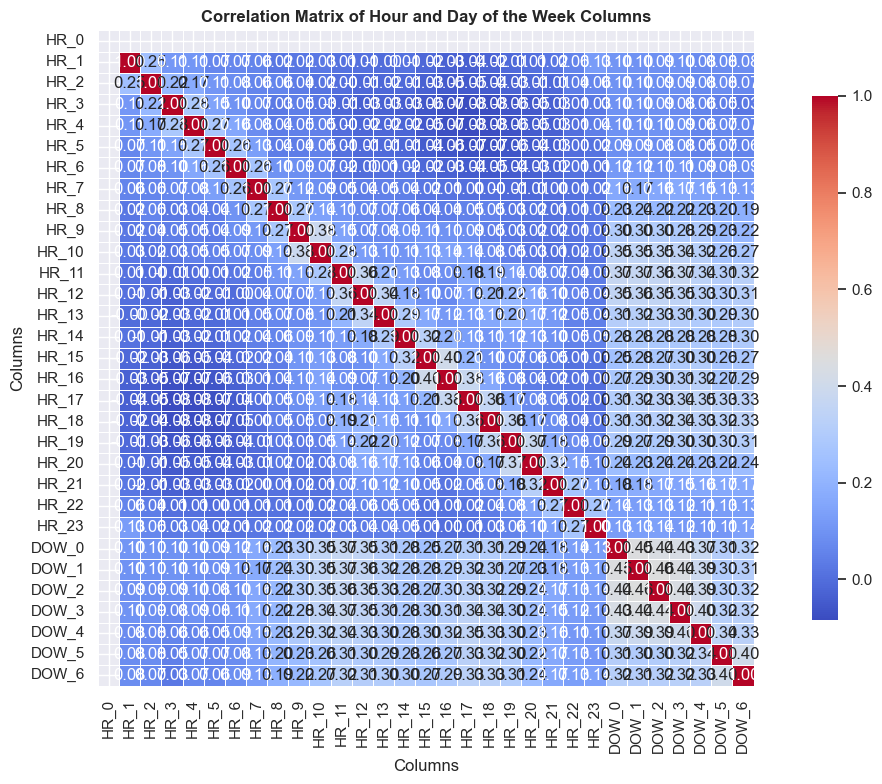

In [93]:
#ganda cagada que eu fiz aqui ahahahahhahahahahahhaha

# Assume df is your DataFrame containing the relevant columns
# First, select the relevant columns for hours and days of the week
hour_columns = [f'HR_{i}' for i in range(24)]  # HR_0 to HR_24
dow_columns = [f'DOW_{i}' for i in range(7)]   # DOW_0 to DOW_6
selected_columns = hour_columns + dow_columns

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, linewidths=.5)

# Title and labels
plt.title('Correlation Matrix of Hour and Day of the Week Columns', fontweight='bold')
plt.xlabel('Columns')
plt.ylabel('Columns')

# Show the heatmap
plt.tight_layout()
plt.show()


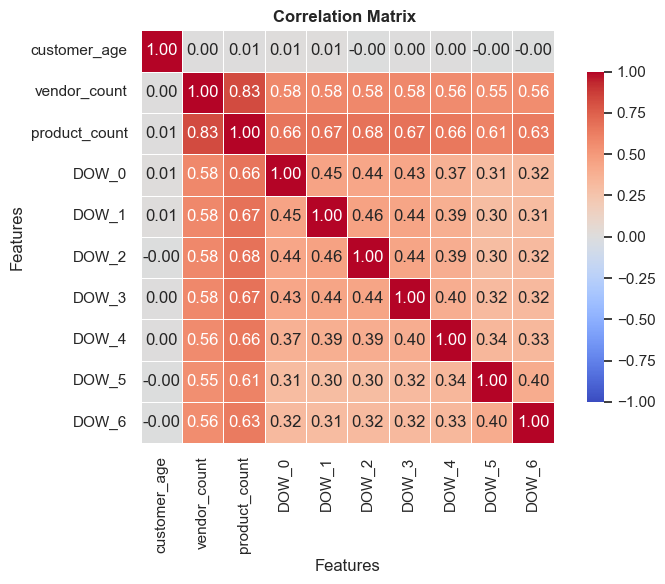

In [94]:

correlation_columns = ['customer_age','vendor_count','product_count','DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5, vmin=-1, vmax=1, center=0)

# Title and labels
plt.title('Correlation Matrix ', fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the heatmap
plt.tight_layout()
plt.show()



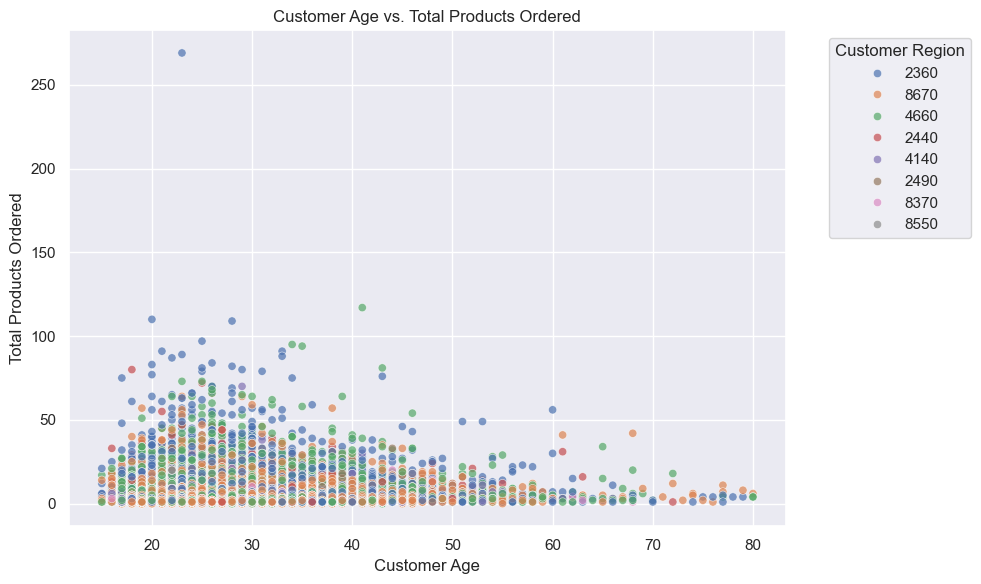

In [67]:
# Scatter plot to show the relationship between customer_age and product_count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='customer_age', y='product_count', hue='customer_region', alpha=0.7)
plt.title('Customer Age vs. Total Products Ordered')
plt.xlabel('Customer Age')
plt.ylabel('Total Products Ordered')
plt.legend(title='Customer Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
